# Homework 3

This homework will explore linear regression and resampling techniques by analyzing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [ ]:
# answer
git clone "https://gitlab.com/wgms/glathida.git"

### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [3]:
# solution
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import netCDF4 as nc

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [4]:
# solution
t_path = pd.read_csv("glathida/data/glacier.csv")
print(t_path.head)

<bound method NDFrame.head of         id  survey_id                   name external_db   external_id  \
0        1          1       Isfallsglaciären         WGI  SE4B000E0006   
1        2          1         Rabots glaciär         WGI  SE4B000E1016   
2        3          1          Storglaciären         WGI  SE4B000E0005   
3        4          2  South Cascade Glacier         WGI  US2M00264006   
4        5          3      Athabasca Glacier         FOG             7   
...    ...        ...                    ...         ...           ...   
1008  6627        254            Mount Adams         NaN           NaN   
1009  6628        255            Mount Adams         NaN           NaN   
1010  6629        256            Mount Adams         NaN           NaN   
1011  6630        128           Mullwitzkees         AGI          6054   
1012  6631        128           Mullwitzkees         AGI          6054   

           lat        lon        date    max_date    area  ...  \
0     67.91500 

**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [42]:
#answer below 
df = t_path.dropna(subset=['mean_thickness','area','mean_slope'])
print(df.head)

<bound method NDFrame.head of        id  survey_id                 name external_db     external_id  \
32     33          9       Easton Glacier         FOG            1367   
33     34         10  Lemon Creek Glacier         FOG            3334   
34     35         11         Praviy Aktru         WGI    SU5A15106127   
35     36         11          Maliy Aktru         WGI    SU5A15106126   
36     37         11          Leviy Aktru         WGI    SU5A15106128   
..    ...        ...                  ...         ...             ...   
619  2111        187          Blekumbreen       GLIMS  G016068E78246N   
627  2119        193    Tuyuksu (central)       GLIMS  G077080E43049N   
631  2123        195       Aldegondabreen         RGI  RGI50-07.01079   
745  2240        209            Ariebreen         RGI  RGI60-07.00209   
833  2328        229    Austre Lovenbreen         RGI  RGI60-07.00496   

           lat         lon        date    max_date    area  ...  \
32   48.750000 -121.830000

## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

### Option 1: Tif and matplotlib

You can use the ``elevation`` data from the DEM seen in class. Download the DEM file (https://www.dropbox.com/s/j5lxhd8uxrtsxko/HYP_50M_SR.tif?dl=1)

In [43]:
# solution
# I downloaded this .tif file to my computer and then uploaded it to jupyter


___Tips___: when plotting a image in ``matplotlib`` you need to add information about the physical dimensions of the image. You can calculate the ``bounds``.

In [44]:
bounds = (elevation.bounds.left, elevation.bounds.right, \
          elevation.bounds.bottom, elevation.bounds.top)

NameError: name 'elevation' is not defined

We will use ``matplotlib.pyplot`` to show the raster image in the background (tips: use ``imshow()``. The raster image in matplotlib can only import one frame and not three (R, G, B) frames. We will first stack the three images together. 

In [45]:
red = elevation.read(1)
green = elevation.read(2)
blue = elevation.read(3)
pix = np.dstack((red, green, blue))

NameError: name 'elevation' is not defined

In [ ]:
# solution


## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [46]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe

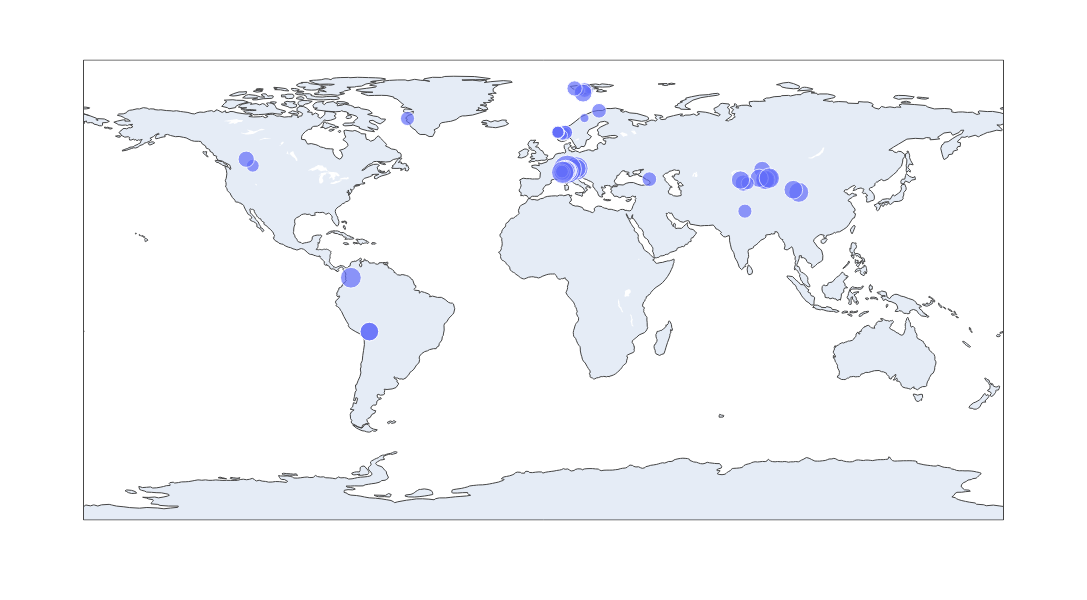

In [47]:
# solution
fig = px.scatter_geo(df,lat='lat',lon='lon', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='mean_slope',
                     hover_name="area",
                     hover_data=['mean_thickness','area','mean_slope']) # size of markers, "pop" is one of the columns of gapminder
fig.show()

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with units. ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

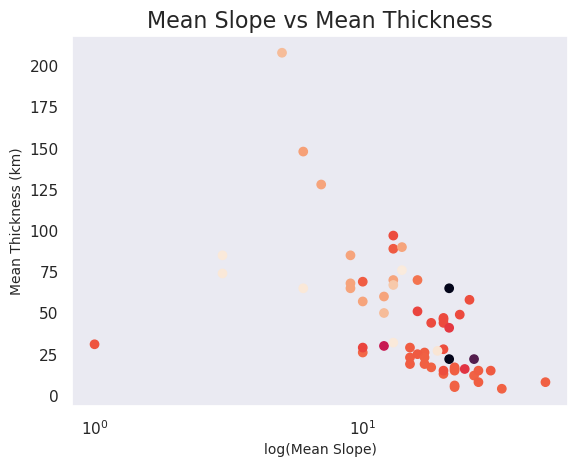

In [162]:
# Figure 1: Mean slope vs mean thickness
# solution
plt.scatter(x=df['mean_slope'], y=df['mean_thickness'],c=df['lat'])
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=16)
plt.title("Mean Slope vs Mean Thickness")
plt.xlabel("log(Mean Slope)")
plt.ylabel("Mean Thickness (km)")
plt.xscale('log')
plt.grid()
plt.show()

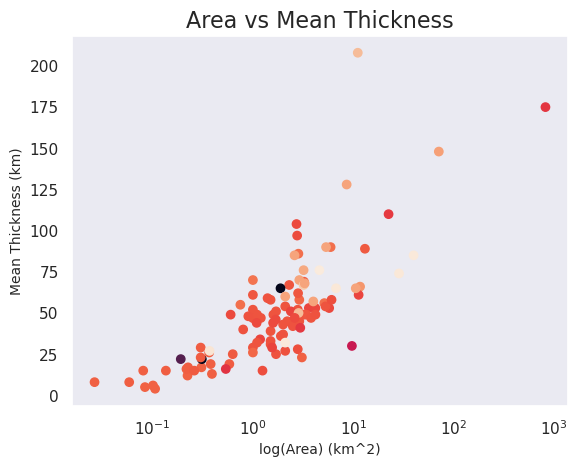

In [163]:
# Figure 2: area vs mean thickness
# solution
plt.scatter(x=df['area'], y=df['mean_thickness'],c=df['lat'])
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=16)
plt.title("Area vs Mean Thickness")
plt.xlabel("log(Area) (km^2)")
plt.ylabel("Mean Thickness (km)")
plt.xscale('log')
plt.grid()
plt.show()

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

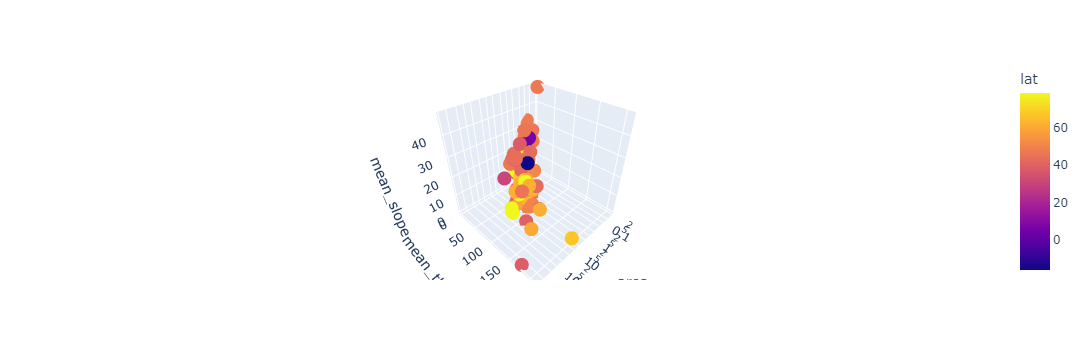

In [50]:
# solution
fig = px.scatter_3d(df, x='area', y='mean_thickness', z='mean_slope',
              color='lat',log_x=True)
fig.show()

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

/tmp/ipykernel_69/3998645979.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



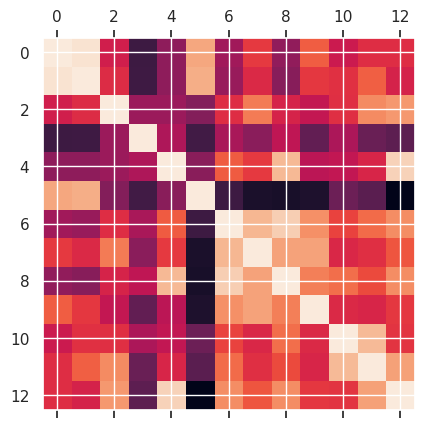

In [51]:
#solution
#df.corr
plt.matshow(df.corr())

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/).

In [ ]:
#solution

/tmp/ipykernel_69/68889831.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



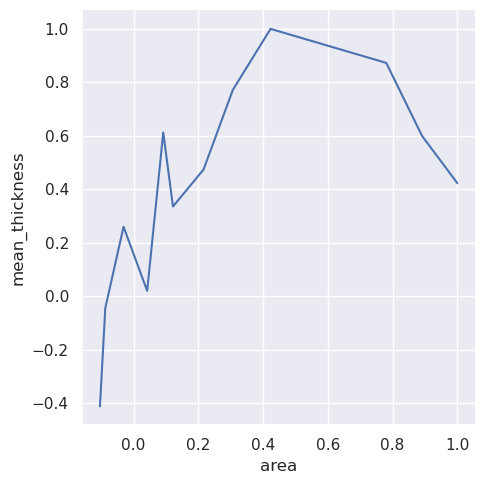

In [52]:
# solution
import seaborn as sns
sns.set_theme()

sns.relplot(data=df.corr(),
         kind="line", x="area", y="mean_thickness")
# hue="smoker", style="smoker", size="size"

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

enter text below
The correlation between area and thickness being positive makes sense (as area increases thickness also increases). The correlation of thickness and 
slope makes sense in a way that a thicker glacier would be more stable and so the slope would be less.

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [53]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
for_reg = np.array(np.log(df['area'])).reshape(-1,1)
reg.fit(for_reg,df['mean_thickness'])

LinearRegression()

Make a plot of the data and the linear regression your performed

<AxesSubplot: xlabel='area', ylabel='mean_thickness'>

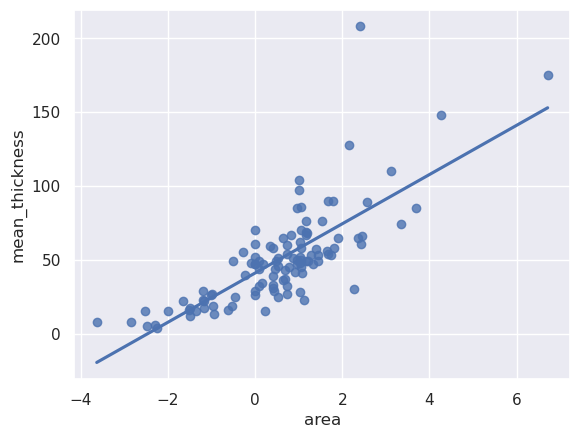

In [118]:
#or train_index, test_index in loo.split(np.log(df['area'])):
#    print("TRAIN:", train_index, "TEST:", test_index)

sns.regplot(x=np.log(df['area']),y=df['mean_thickness'], ci=None)

**Briefly comment on the quality of your fit and a linear regression (1 point)**

The fit looks pretty good, except that there are outliers on mean thickness and a couple of outliers on the high end of area.

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/srv/conda/envs/notebook/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning:

R^2 score is not well

[16.66498268] 16.664333102724527


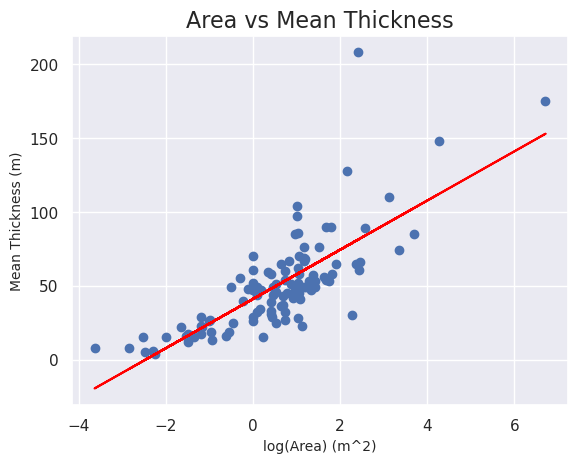

In [152]:
from sklearn.model_selection import LeaveOneOut
# solution
step_1 = np.zeros(len(df)) 
mse_train = np.zeros(len(df))
mse_val = np.zeros(len(df))
r2s = np.zeros(len(df))
i=0
dfX = for_reg
tY = np.array(df['mean_thickness']).reshape(-1,1)
for train_index, test_index in loo.split(dfX):

    E_train, E_val = dfX[train_index,], dfX[test_index[0]]
    t_train, t_val = tY[train_index,], tY[test_index[0]]
 
    E_val = E_val.reshape(1,-1)
    t_val = t_val.reshape(1,-1)

    reg=LinearRegression()

    reg.fit(E_train,t_train)

    Epred_train=reg.predict(t_train) 
    Epred_val=reg.predict(t_val) 

    # The coefficients
    step_1[i]= reg.coef_[0]
    mse_train[i]= mean_squared_error(E_train, Epred_train)
    mse_val[i]= mean_squared_error(E_val, Epred_val)
    r2s[i]=r2_score(E_val, Epred_val)
    i+=1

    
real_x = dfX.reshape(-1,)
plt.plot(real_x, tY, 'o')
plt.rc('axes',labelsize=10)
plt.rc('axes',titlesize=16)
plt.title("Area vs Mean Thickness")
plt.xlabel("log(Area) (m^2)")
plt.ylabel("Mean Thickness (m)")
m, b = np.polyfit(real_x, tY, 1)
print(m, np.mean(step_1))
plt.plot(real_x, np.mean(step_1)*real_x+b, color ='red')
plt.show()

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

mean of the slope estimates 16.627812 and the standard deviation 1.599257


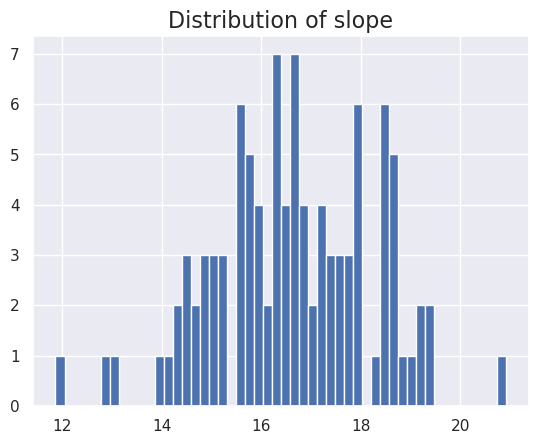

In [158]:
from sklearn.utils import resample
# solution

k=100
answer = np.zeros(k) 
mse = np.zeros(k)
r2s = np.zeros(k)
i=0
for iik in range(k):    
    ii = resample(np.arange(len(dfX)),replace=True,n_samples=len(dfX))
    E_b, t_b = for_reg[ii], tY[ii]
    
 
    reg.fit(E_b,t_b)
    Epred_val=reg.predict(tY) 

   
    answer[i]= reg.coef_[0][0]
    i+=1

print("mean of the slope estimates %f and the standard deviation %f"%(np.mean(answer),np.std(answer)))

plt.hist(answer,50);plt.title('Distribution of slope');plt.grid(True)
plt.show()

### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

mean of the slope estimates 16.470560 and the standard deviation 1.611654


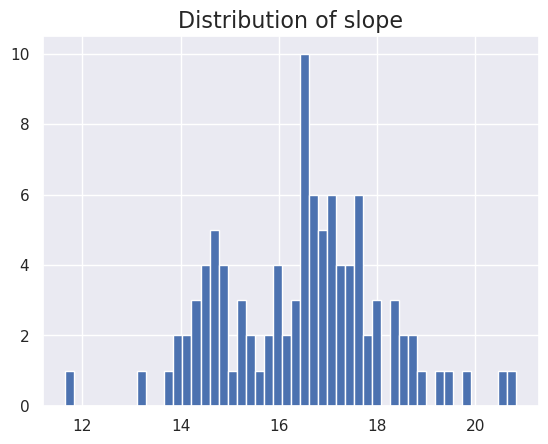

In [161]:
# solution
k=100
answer = np.zeros(k) 
mse = np.zeros(k)
r2s = np.zeros(k)
i=0
for iik in range(k):    
    ii = resample(np.arange(len(dfX)),replace=True,n_samples=len(dfX))
    E_b, t_b = for_reg[ii], tY[ii]
    
 
    reg.fit(E_b,t_b)
    ten = np.array([10]).reshape(1,-1)
    Epred_val=reg.predict(ten) 

   
    answer[i]= reg.coef_[0][0]
    i+=1

print("mean of the slope estimates %f and the standard deviation %f"%(np.mean(answer),np.std(answer)))

plt.hist(answer,50);plt.title('Distribution of slope');plt.grid(True)
plt.show()